# Generate Simulated Data: Random-Plaintext-Dataset-1

In [2]:
#import python libraries

import unittest
import random
from random import randint
from random import gauss
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import os.path
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
from tqdm import tnrange,tqdm_notebook

In [3]:
# Define lengh for the data set
data_leng = 100000
numberOfSamples = 50

# Define key for encryption
key = 23

#Random Plaintext
FixedPlaintext = False

# Define gauss niose
noiseStart = 0.0
noiseEnd = 5.0

# Define jitter shift range
activateJitter = False

if activateJitter == True:
    # Value for jitter 
    jitterLeft = -4
    jitterRight = 4
else:
    jitterLeft = None
    jitterRight = None

In [4]:
# Define settings table
settingsTable = pd.DataFrame([None])
settingsTable['data_leng'] = pd.DataFrame([data_leng])
settingsTable['numberOfSamples'] = numberOfSamples
settingsTable['key'] = key
settingsTable['noiseStart'] = noiseStart
settingsTable['noiseEnd'] = noiseEnd
settingsTable['jitterLeft'] = jitterLeft
settingsTable['jitterRight'] = jitterRight
settingsTable = settingsTable.drop(0,axis=True)

In [5]:
settingsTable

,data_leng,numberOfSamples,key,noiseStart,noiseEnd,jitterLeft,jitterRight
0,100000,50,23,0.0,5.0,None,None


In [6]:
# AES Sbox
AES_Sbox = np.array([
            0x63, 0x7C, 0x77, 0x7B, 0xF2, 0x6B, 0x6F, 0xC5, 0x30, 0x01, 0x67, 0x2B, 0xFE, 0xD7, 0xAB, 0x76,
            0xCA, 0x82, 0xC9, 0x7D, 0xFA, 0x59, 0x47, 0xF0, 0xAD, 0xD4, 0xA2, 0xAF, 0x9C, 0xA4, 0x72, 0xC0,
            0xB7, 0xFD, 0x93, 0x26, 0x36, 0x3F, 0xF7, 0xCC, 0x34, 0xA5, 0xE5, 0xF1, 0x71, 0xD8, 0x31, 0x15,
            0x04, 0xC7, 0x23, 0xC3, 0x18, 0x96, 0x05, 0x9A, 0x07, 0x12, 0x80, 0xE2, 0xEB, 0x27, 0xB2, 0x75,
            0x09, 0x83, 0x2C, 0x1A, 0x1B, 0x6E, 0x5A, 0xA0, 0x52, 0x3B, 0xD6, 0xB3, 0x29, 0xE3, 0x2F, 0x84,
            0x53, 0xD1, 0x00, 0xED, 0x20, 0xFC, 0xB1, 0x5B, 0x6A, 0xCB, 0xBE, 0x39, 0x4A, 0x4C, 0x58, 0xCF,
            0xD0, 0xEF, 0xAA, 0xFB, 0x43, 0x4D, 0x33, 0x85, 0x45, 0xF9, 0x02, 0x7F, 0x50, 0x3C, 0x9F, 0xA8,
            0x51, 0xA3, 0x40, 0x8F, 0x92, 0x9D, 0x38, 0xF5, 0xBC, 0xB6, 0xDA, 0x21, 0x10, 0xFF, 0xF3, 0xD2,
            0xCD, 0x0C, 0x13, 0xEC, 0x5F, 0x97, 0x44, 0x17, 0xC4, 0xA7, 0x7E, 0x3D, 0x64, 0x5D, 0x19, 0x73,
            0x60, 0x81, 0x4F, 0xDC, 0x22, 0x2A, 0x90, 0x88, 0x46, 0xEE, 0xB8, 0x14, 0xDE, 0x5E, 0x0B, 0xDB,
            0xE0, 0x32, 0x3A, 0x0A, 0x49, 0x06, 0x24, 0x5C, 0xC2, 0xD3, 0xAC, 0x62, 0x91, 0x95, 0xE4, 0x79,
            0xE7, 0xC8, 0x37, 0x6D, 0x8D, 0xD5, 0x4E, 0xA9, 0x6C, 0x56, 0xF4, 0xEA, 0x65, 0x7A, 0xAE, 0x08,
            0xBA, 0x78, 0x25, 0x2E, 0x1C, 0xA6, 0xB4, 0xC6, 0xE8, 0xDD, 0x74, 0x1F, 0x4B, 0xBD, 0x8B, 0x8A,
            0x70, 0x3E, 0xB5, 0x66, 0x48, 0x03, 0xF6, 0x0E, 0x61, 0x35, 0x57, 0xB9, 0x86, 0xC1, 0x1D, 0x9E,
            0xE1, 0xF8, 0x98, 0x11, 0x69, 0xD9, 0x8E, 0x94, 0x9B, 0x1E, 0x87, 0xE9, 0xCE, 0x55, 0x28, 0xDF,
            0x8C, 0xA1, 0x89, 0x0D, 0xBF, 0xE6, 0x42, 0x68, 0x41, 0x99, 0x2D, 0x0F, 0xB0, 0x54, 0xBB, 0x16
            ])

In [7]:
# Generate random plaintext
plaintext = []
fixedPlaintext = random.randint(0,255)
for x in range(data_leng):
    if FixedPlaintext == True:
        plaintext.append(fixedPlaintext)
    else:
        plaintext.append(random.randint(0,255))

print("plaintext:",plaintext[0:5])

plaintext: [185, 155, 116, 69, 11]


In [8]:
# Verify size of plaintext
len(plaintext)

100000

In [9]:
#Generate leaked data with key=23 and labels
leakedData = []
#fixed key
key = 23
labels = []
for d in plaintext:
    leakedData.append(bin((AES_Sbox[d^key])).count("1")+gauss(noiseStart, noiseEnd))
    labels.append(bin(AES_Sbox[d^key]).count("1"))
print("leakedData:",leakedData[0:5],"\nlabels:",labels[0:5])

leakedData: [2.802662070122251, 0.9505790418833393, 3.170572250511992, -0.19297288664617362, 9.43266048703127] 
labels: [4, 3, 7, 0, 4]


In [10]:
# Verify size of leakedData 
len(leakedData)

100000

In [11]:
# Verify size of labels 
len(labels)

100000

In [12]:
# Generate random traces and repalce the t=25 with the leaked data
from collections import deque
rawTraces = []
randomJitter = []
# Loop to generate the traces
for i in tnrange(data_leng):
    rawData=[]
    
    #loop to repalce the sample
    for z in range(numberOfSamples):
        
        # replace at index 24 equal to t=25, index i matches with the leaked data
        if z == 24:
            rawData.append(leakedData[i])
        # Else create random sample
        else:   
            rawData.append(bin(randint(0,255)).count("1")+gauss(noiseStart, noiseEnd))
    
    # Add jitter
    if activateJitter == True:
        item = deque(rawData)
        tmpJitter = random.randint(jitterLeft,jitterRight)
        item.rotate(tmpJitter)
        randomJitter.append(tmpJitter)
        
        #Full dataset with all traces 
        rawTraces.append(item)
    else:
        rawTraces.append(rawData)

print("First generated trace: ",rawTraces[0])
print("Second generated trace:",rawTraces[1])
print("Third generated trace: ",rawTraces[2])


First generated trace:  [-0.5782852722377179, 1.165116471457245, 8.697947572553065, 1.378698016895336, 3.0731283564532683, 9.952965531908854, -2.214814959530142, 1.9693535299060327, 5.329977699992794, 0.2694069073623746, 4.179727793706707, 7.917722008467457, -3.2418594583805307, 1.8644365046631228, 4.600602985969919, 9.953579870559876, 9.448723889283338, 7.006100900018008, 4.107828809160441, 2.383809777378298, 2.0327315109402706, 7.8238291682885155, 3.120866155001216, 12.47533206775399, 2.802662070122251, 3.0966079619635605, 4.179426698162344, 7.091003930642645, 15.223043415247936, 10.187308794586487, 7.118382042373427, 7.156603965450937, 8.079972957199594, 5.2114497663511, 13.169517828477355, -2.1740070906130473, 9.631868667356136, 4.5437577968765215, 8.31575381758383, 6.585088773998504, -4.189056145736224, 5.195836865720606, 7.355370814289807, 1.7465432847427467, -0.6887094589080842, 10.150497037992608, -0.1724513819066562, 1.5419736273306146, 2.8294182598549327, 0.01199044711226982

In [13]:
# Verify size of leakedData 
len(rawTraces)

100000

## Plot Simulated Data

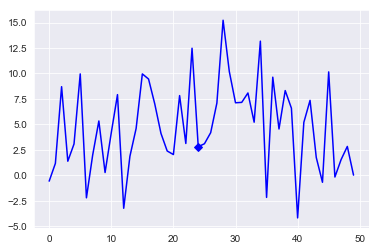

In [14]:
sns.set_style("darkgrid")
plt.plot(rawTraces[0],'-bD',markevery=[24])

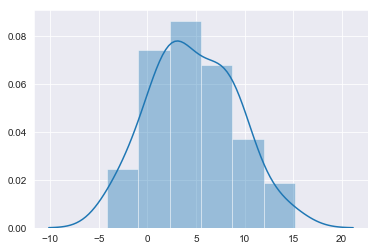

In [15]:
sns.distplot(rawTraces[0])

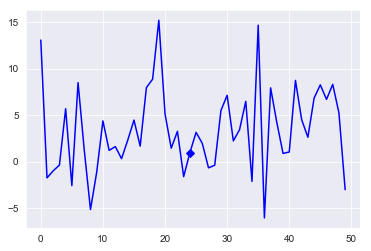

In [16]:
plt.plot(rawTraces[1],'-bD',markevery=[24])

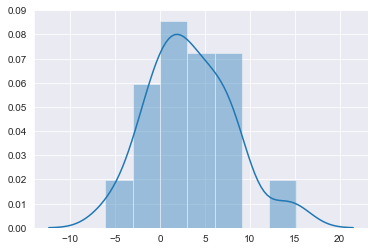

In [17]:
sns.distplot(rawTraces[1])

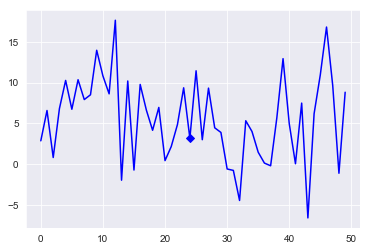

In [18]:
plt.plot(rawTraces[2],'-bD',markevery=[24])

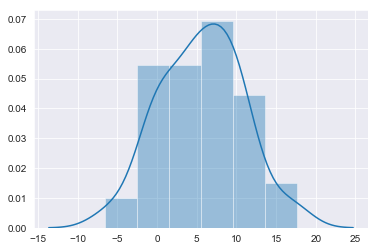

In [19]:
sns.distplot(rawTraces[2])

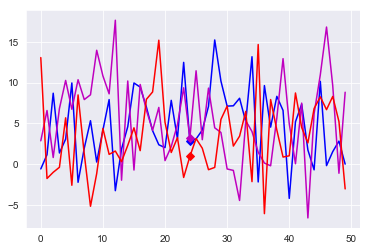

In [20]:
plt.plot(rawTraces[0],'-bD',rawTraces[2],'-mD',rawTraces[1],'-rD',markevery=[24])

### Data Path

In [21]:
#Set data path
dataPath = ''
if FixedPlaintext == True:
    dataPath = 'FixedPlaintext'
else:
    dataPath = 'RandomPlaintext'

### Unit Tests

In [22]:
class TestNotebook(unittest.TestCase):

    def test_LeakedData_size_equals_labels(self):
        self.assertEqual(len(leakedData), len(labels))
    def test_DataSize(self):
        self.assertEqual(len(leakedData), data_leng)    
        self.assertEqual(len(labels), data_leng)
    def test_FixedPlaintext(self):
        self.assertEqual(FixedPlaintext, False) 
    def test_Jitter(self):
        self.assertEqual(activateJitter, False)
    def test_DataPath(self):
        self.assertEqual(dataPath, 'RandomPlaintext')
        
unittest.main(argv=[''], verbosity=2, exit=False)

test_DataPath (__main__.TestNotebook) ... ok
test_DataSize (__main__.TestNotebook) ... ok
test_FixedPlaintext (__main__.TestNotebook) ... ok
test_Jitter (__main__.TestNotebook) ... ok
test_LeakedData_size_equals_labels (__main__.TestNotebook) ... ok

----------------------------------------------------------------------
Ran 5 tests in 0.032s

OK


In [23]:
rawTraces = pd.DataFrame(rawTraces)
rawTraces['label'] = pd.DataFrame(plaintext)
rawTraces.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,label
0,-0.578285,1.165116,8.697948,1.378698,3.073128,9.952966,-2.214815,1.969354,5.329978,0.269407,...,5.195837,7.355371,1.746543,-0.688709,10.150497,-0.172451,1.541974,2.829418,0.011990,185
1,13.064516,-1.747798,-0.989001,-0.375854,5.682557,-2.578178,8.488861,1.229407,-5.152216,-1.145871,...,8.727470,4.500605,2.614055,6.825194,8.251038,6.684161,8.302209,5.227769,-3.024470,155
2,2.864733,6.579495,0.822740,6.815489,10.264711,6.733662,10.350457,7.920819,8.507608,13.959810,...,0.058627,7.487505,-6.578598,6.188608,10.960969,16.805466,9.626880,-1.107174,8.819596,116
3,2.093448,6.928192,7.874016,7.945202,3.938194,-1.491230,5.266944,5.006656,19.939073,2.174782,...,6.044512,2.124086,-4.759104,4.990134,-3.065503,11.643213,2.911883,-1.812683,1.689869,69
4,9.347875,-1.413434,10.351699,2.535517,6.406268,6.045298,-0.393823,4.382905,3.538367,-0.427469,...,8.908759,2.667886,1.914895,8.235221,6.604767,2.724964,-6.136769,16.069682,0.208456,11


### Write Data

In [24]:
simulated_traces = pd.DataFrame(rawTraces)
simulated_traces.to_csv('./'+dataPath+'/TS1.csv',index=False)